In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from protest_impact.data.protests.sources.acled import load_acled

acled = load_acled()
from protest_impact.data.news.sources.mediacloud import newspapers_by_region

acled = acled[acled["admin1"].isin(newspapers_by_region.keys())]
climate_actors = ["FFF: Fridays for Future; Students (Germany)"]
acled = acled[acled["assoc_actor_1"].isin(climate_actors)]
acled = acled[
    (acled["event_date"] >= "2020-07-01") & (acled["event_date"] < "2022-07-01")
]

In [3]:
acled = acled.sample(100)

In [4]:
from protest_impact.synthetic_region import evaluate_multiple_protests

metrics, dfs, agg_df = evaluate_multiple_protests(
    "klimaschutz", acled, source="mediacloud"
)
agg_df.head()

100%|██████████| 90/90 [00:06<00:00, 14.23it/s]

date      real  synth_mean  synth_lasso  synth_linear_regression  \
0  -168  0.372619    1.128085     0.564564                 0.546403   
1  -167  0.197488    0.238343     0.378074                 0.351887   
2  -166  0.322475    0.245550     0.222157                 0.218315   
3  -165  0.734195    1.247537     0.704875                 0.696320   
4  -164  0.742749    0.818700     0.757433                 0.730205   

   synth_boosting  synth_random_forest  
0        0.496546             0.501839  
1        0.535524             0.481862  
2        0.446741             0.449700  
3        0.816471             0.799512  
4        0.899937             0.870677

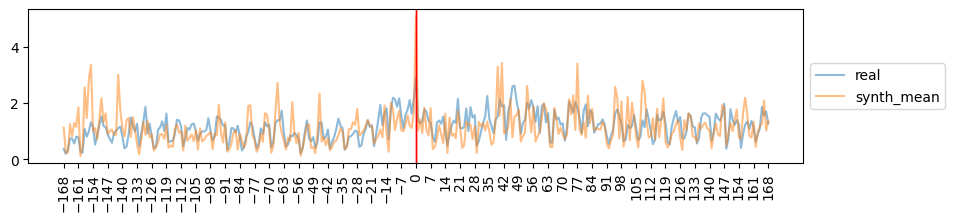

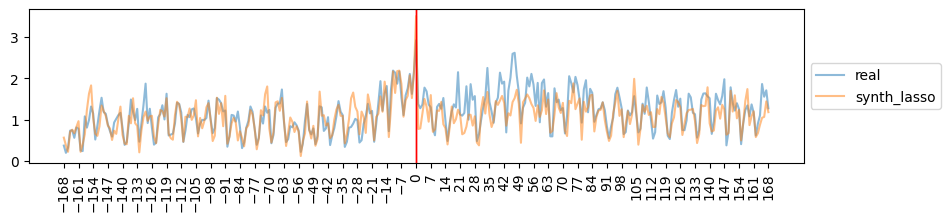

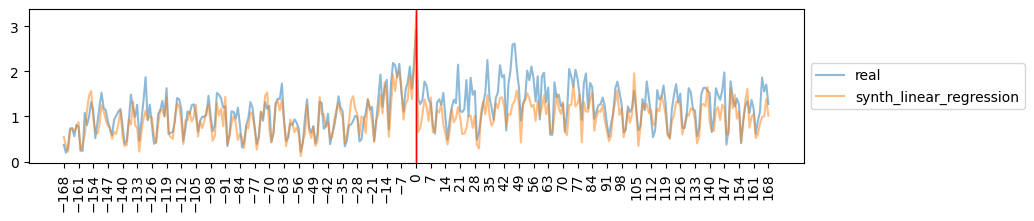

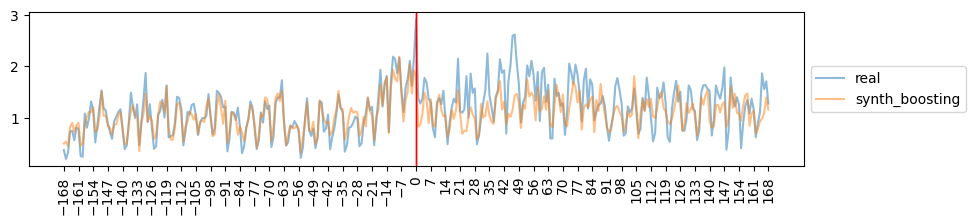

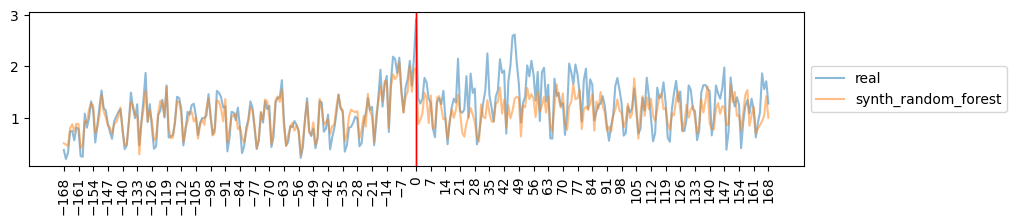

In [5]:
import matplotlib.pyplot as plt
from protest_impact.data.discourse.visual import plot_coverage_sequence

for group in [
    "synth_mean",
    "synth_lasso",
    "synth_linear_regression",
    "synth_boosting",
    "synth_random_forest",
]:
    fig, ax = plt.subplots(figsize=(10, 2))
    plot_coverage_sequence(
        agg_df.rename(columns={"real": "count"}), ax=ax, label="real"
    )
    plot_coverage_sequence(agg_df.rename(columns={group: "count"}), ax=ax, label=group)
    plt.show()

In [6]:
len(dfs), len(metrics)

(33, 33)

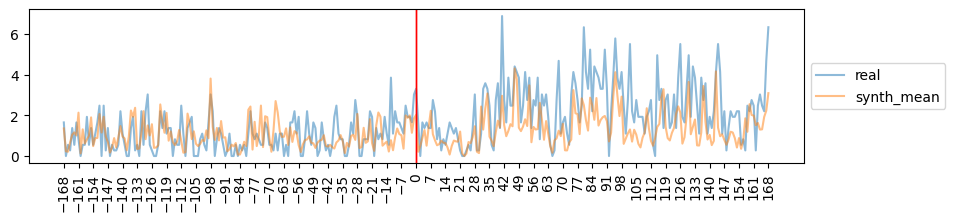

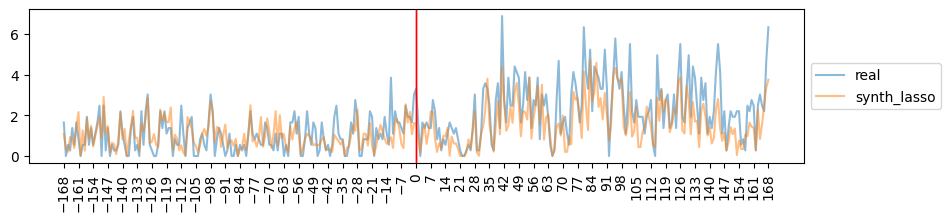

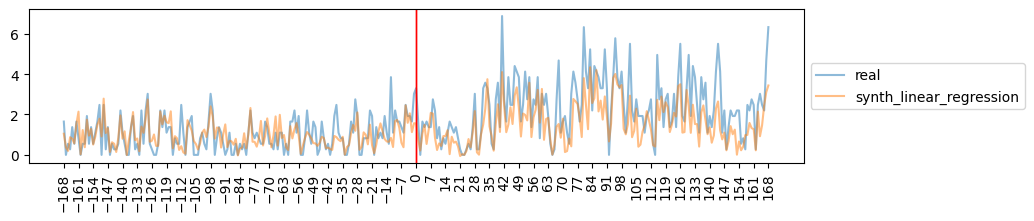

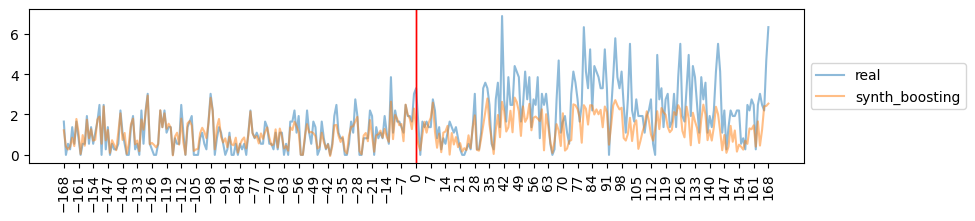

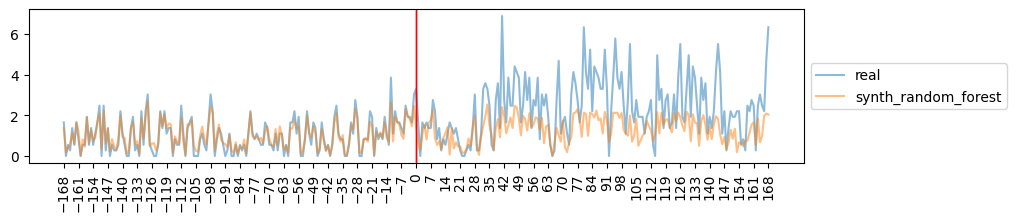

----------


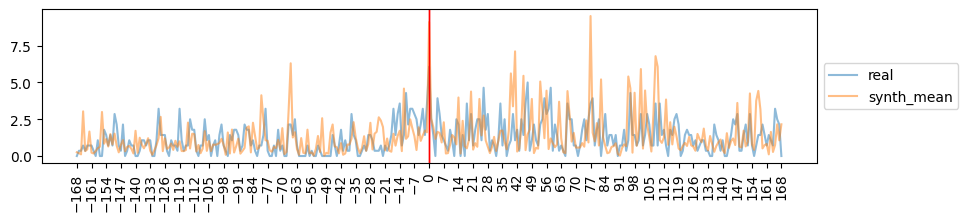

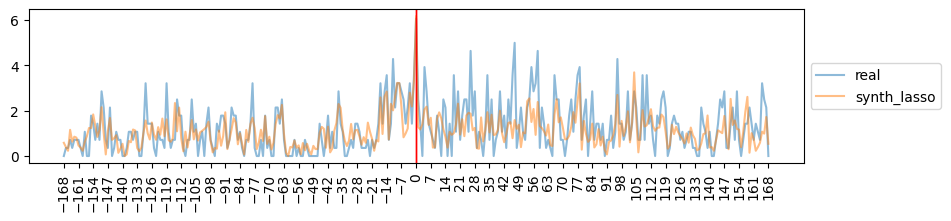

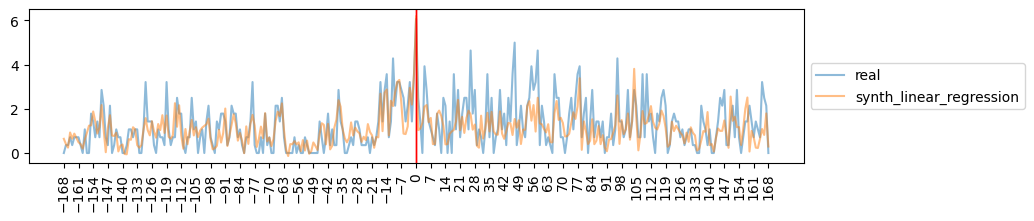

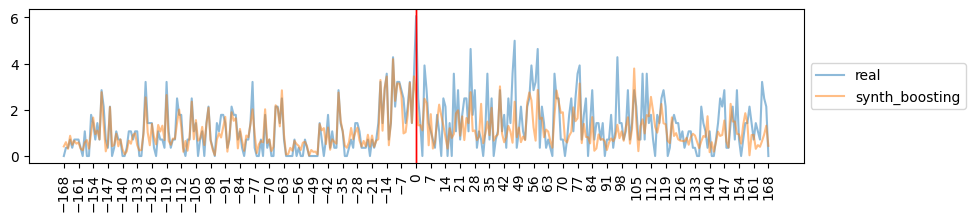

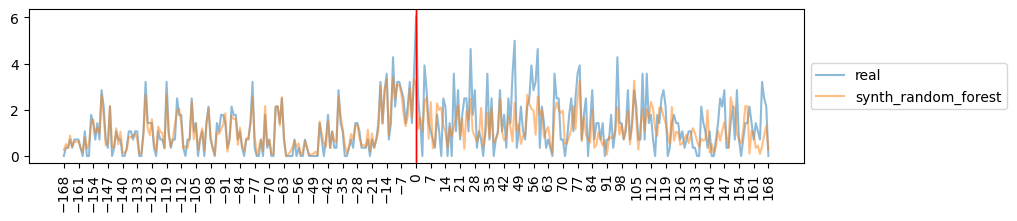

----------


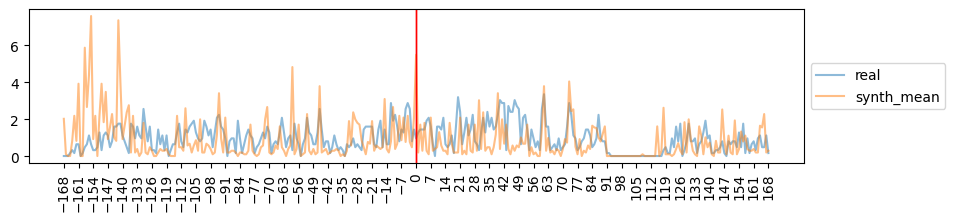

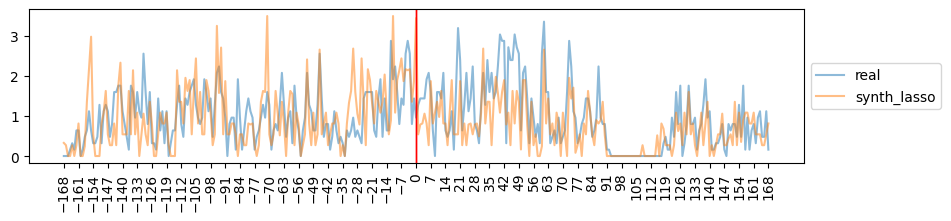

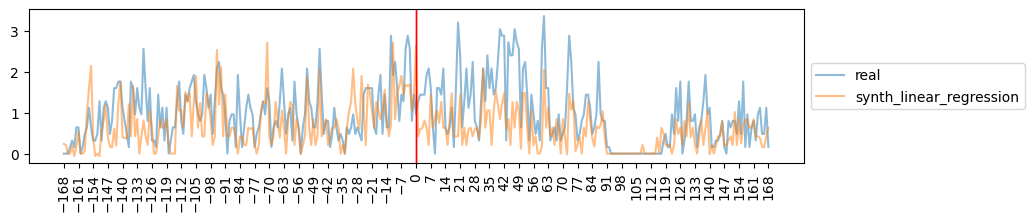

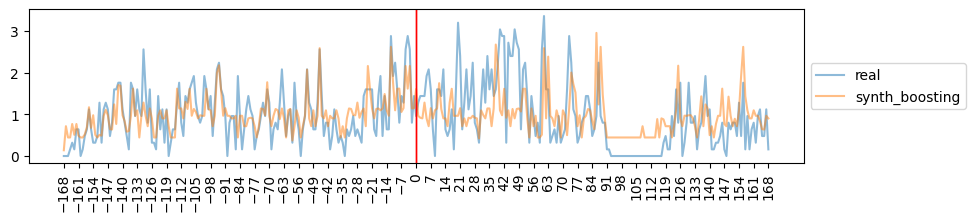

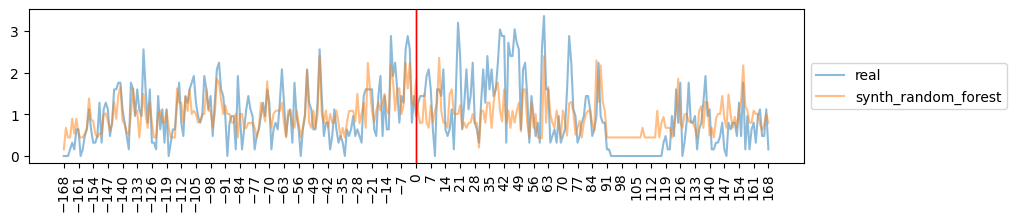

----------


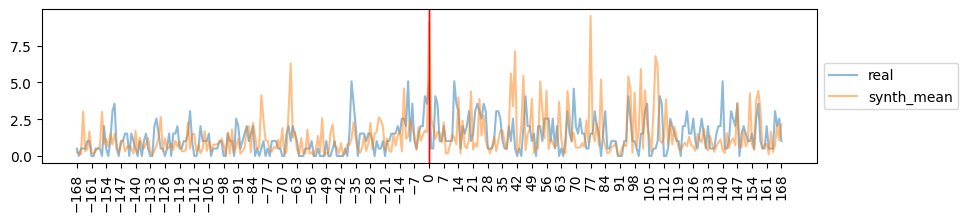

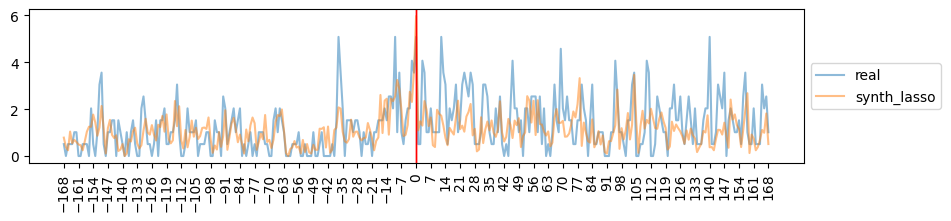

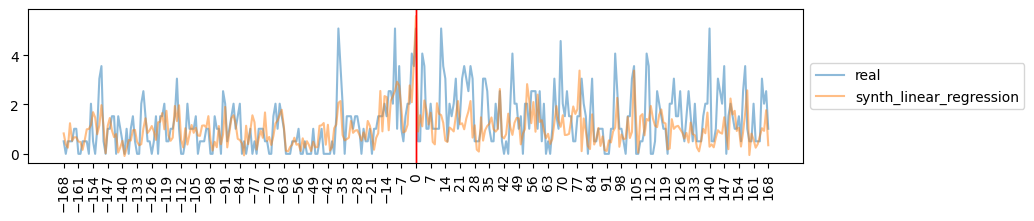

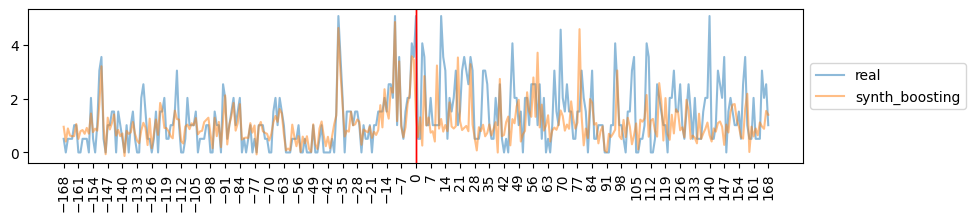

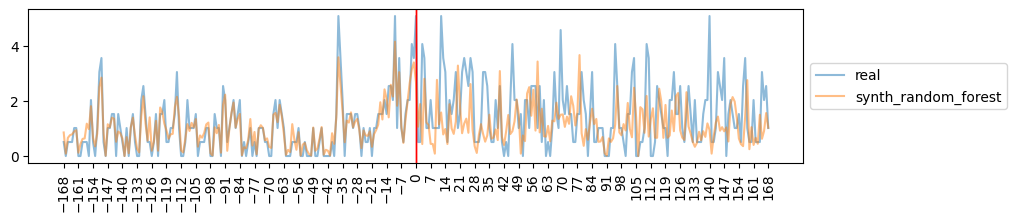

----------


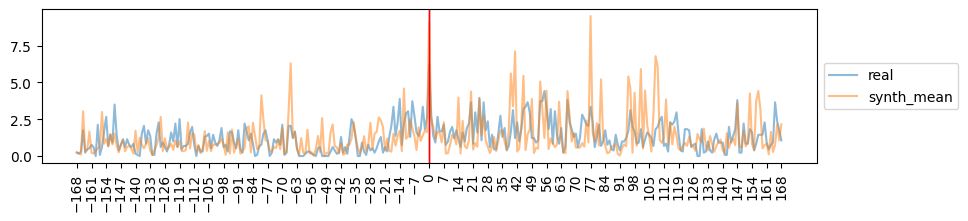

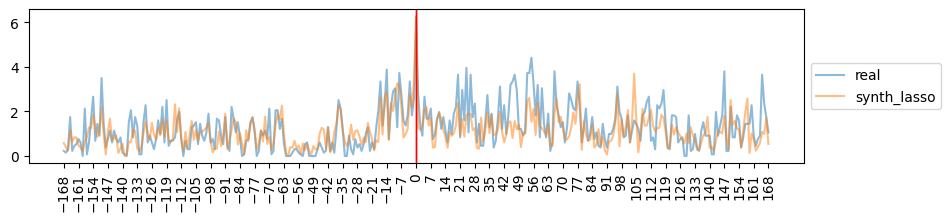

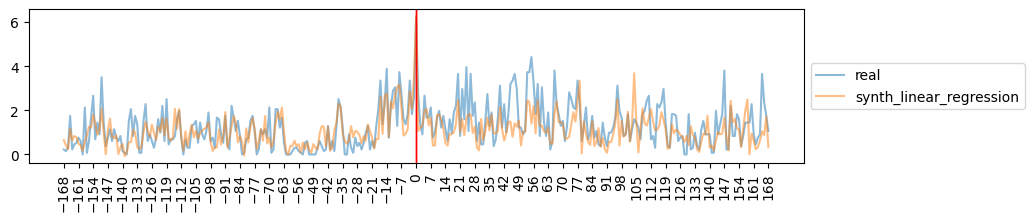

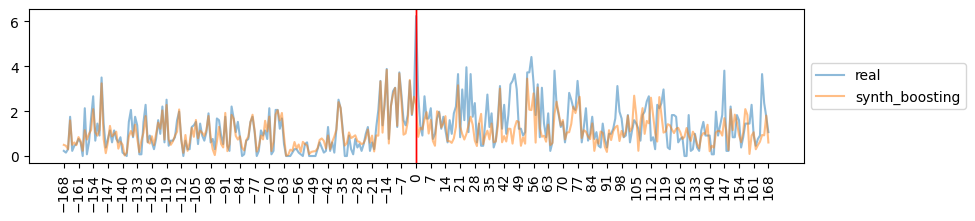

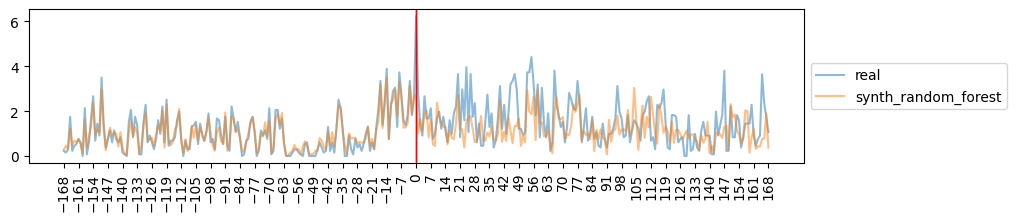

----------


In [7]:
for df in dfs[:5]:
    for method in [
        "synth_mean",
        "synth_lasso",
        "synth_linear_regression",
        "synth_boosting",
        "synth_random_forest",
    ]:
        fig, ax = plt.subplots(figsize=(10, 2))
        plot_coverage_sequence(
            df.rename(columns={"real": "count"}), ax=ax, label="real"
        )
        plot_coverage_sequence(
            df.rename(columns={method: "count"}), ax=ax, label=method
        )
        df["diff"] = df["real"] - df[method]
        # plot_coverage_sequence(
        #     df.rename(columns={"diff": "count"}), ax=ax, label=f"diff ({method})"
        # )
        plt.show()
    print("----------")

In [8]:
from protest_impact.data.protests.random import get_random_events

random_events = get_random_events(100)

In [15]:
from protest_impact.synthetic_region import evaluate_multiple_protests

metrics, dfs, agg_df = evaluate_multiple_protests(
    "klimaschutz", random_events, source="mediacloud"
)
agg_df.head()

100%|██████████| 81/81 [00:14<00:00,  5.42it/s]

date      real  synth_mean  synth_lasso  synth_linear_regression  \
0  -168  0.908029    1.293262     1.042087                 1.015854   
1  -167  1.041988    1.281849     1.120025                 1.051515   
2  -166  0.922830    1.051847     1.017537                 0.972409   
3  -165  0.924659    1.428912     0.961167                 0.862615   
4  -164  0.882194    0.955890     0.938452                 0.897704   

   synth_boosting  synth_random_forest  
0        0.961893             0.953262  
1        1.028400             1.039302  
2        0.988731             0.969633  
3        0.880686             0.949184  
4        0.837235             0.889619

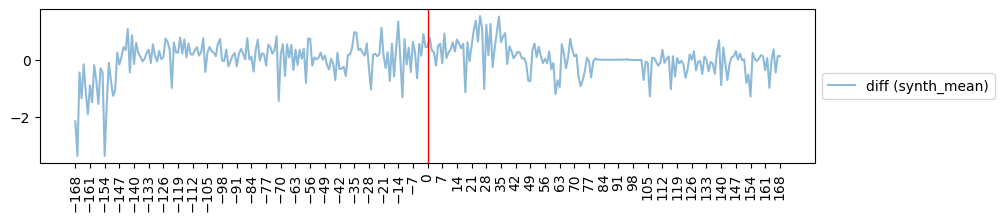

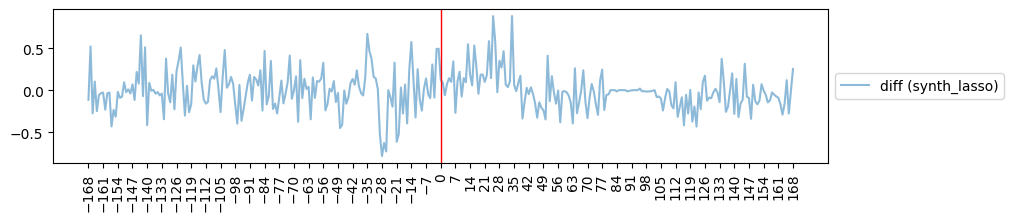

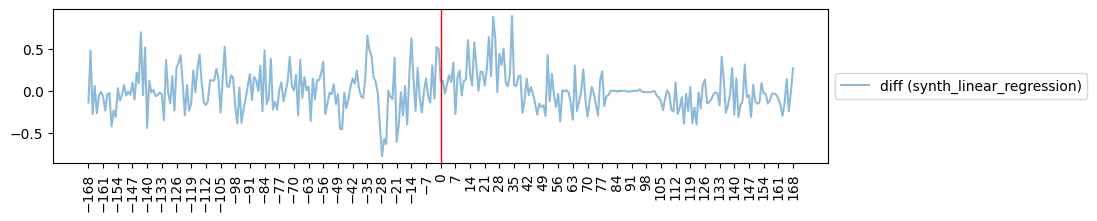

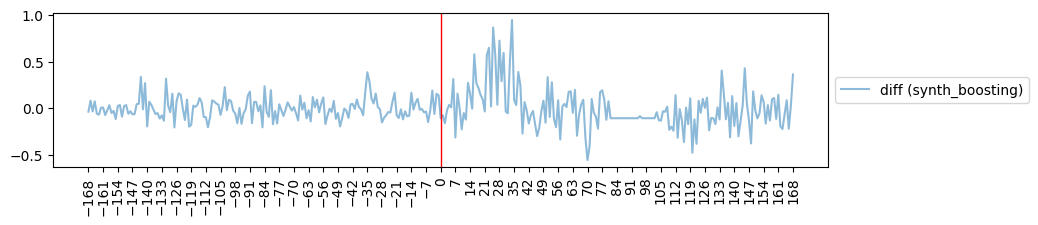

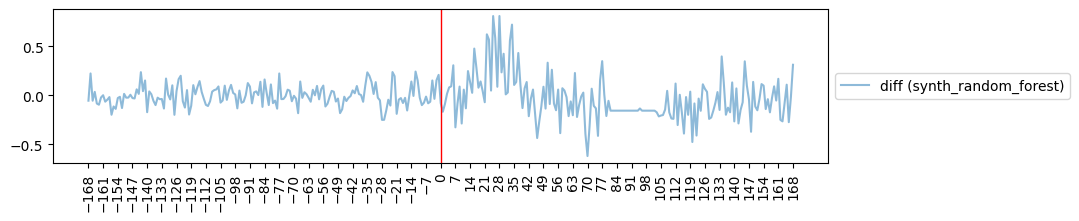

----------


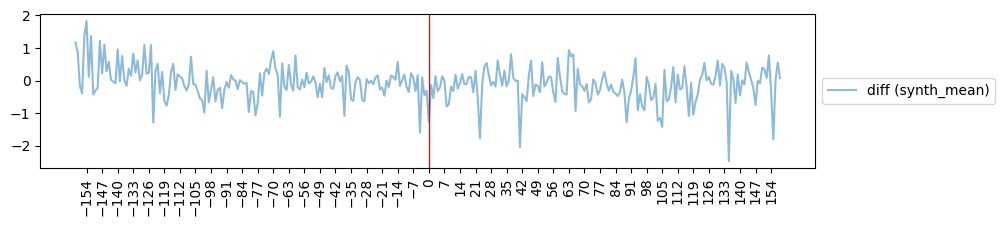

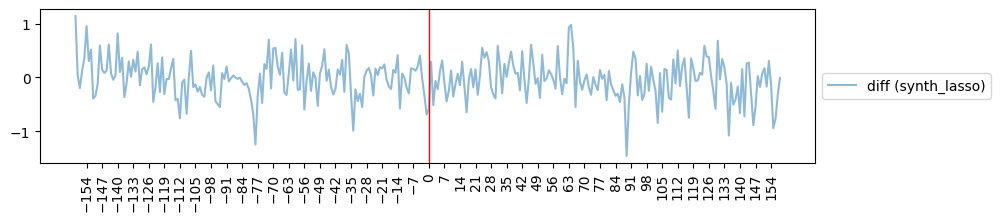

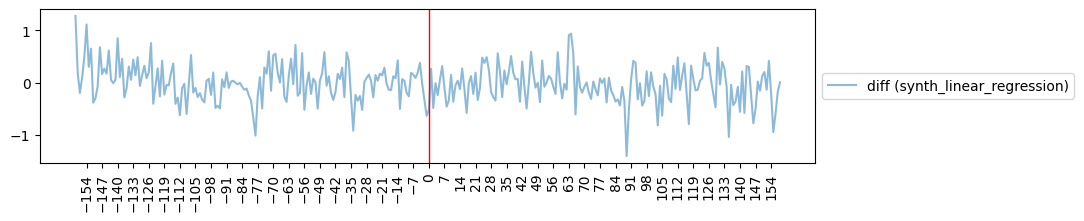

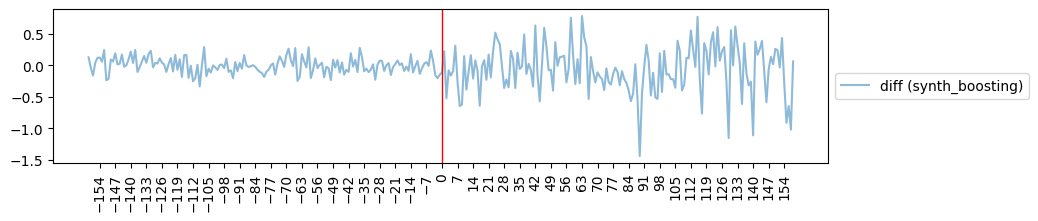

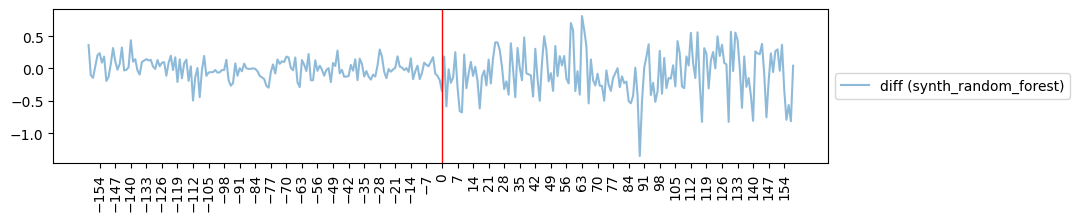

----------


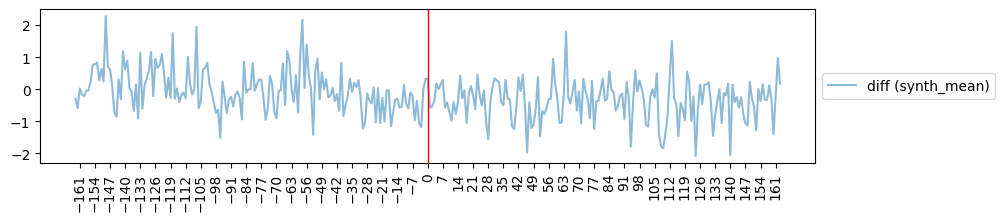

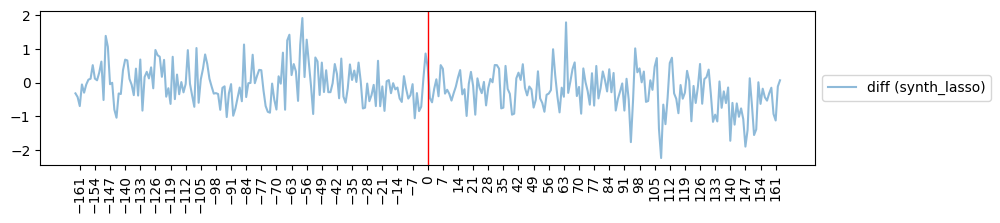

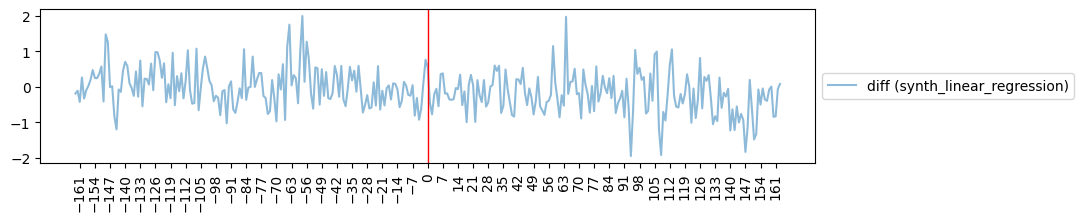

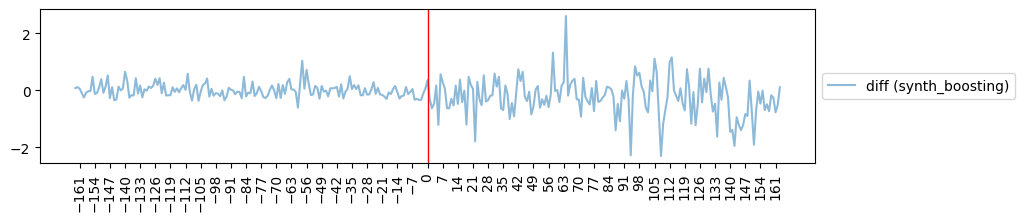

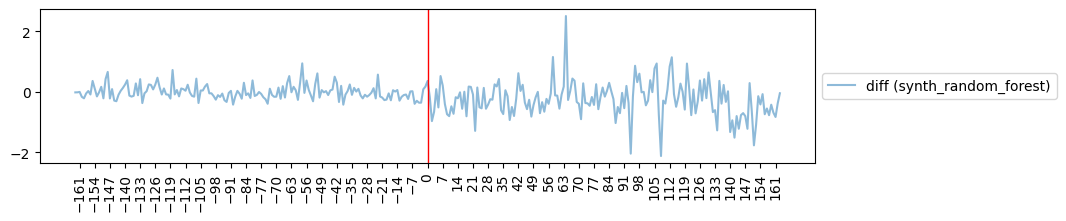

----------


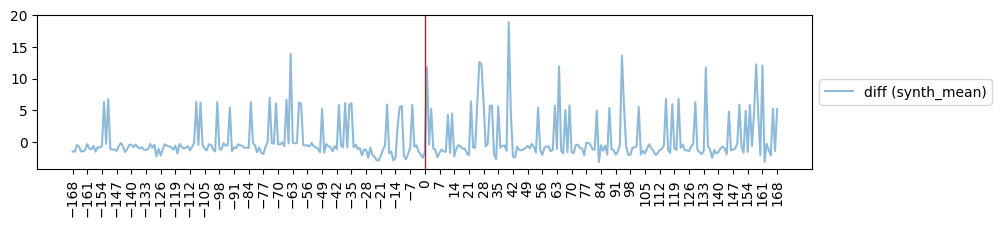

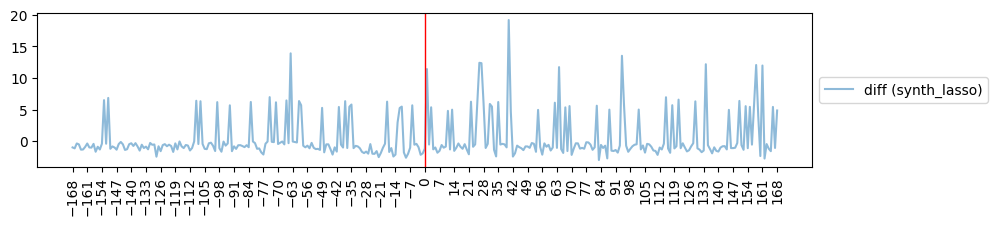

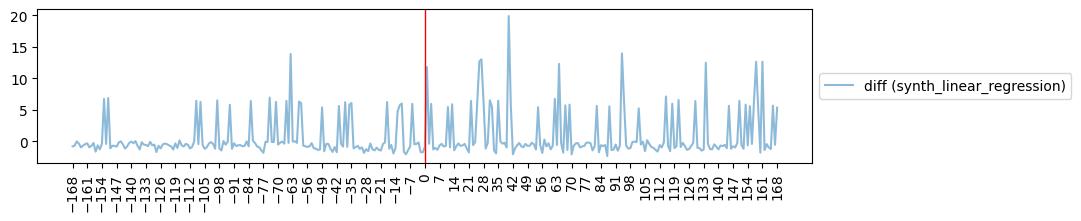

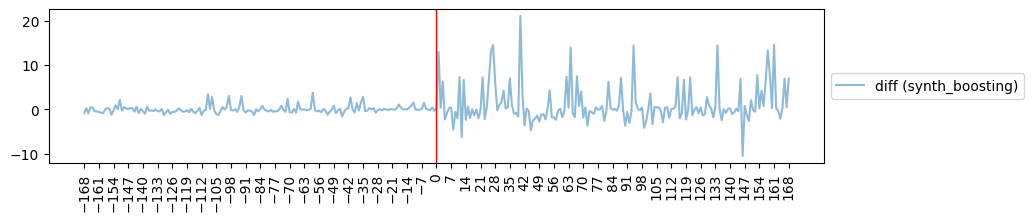

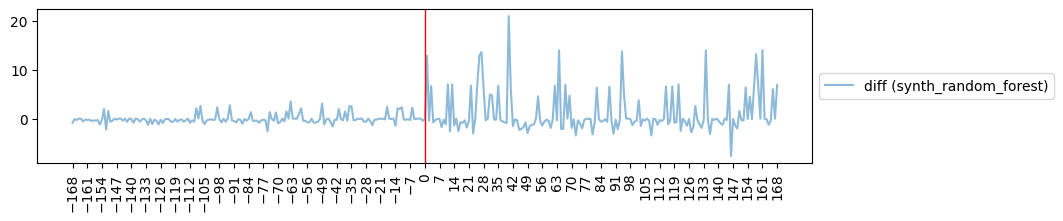

----------


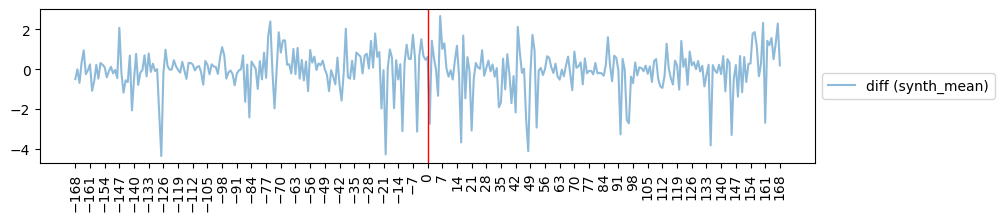

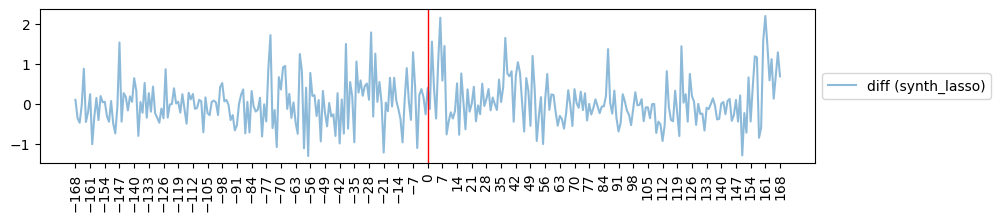

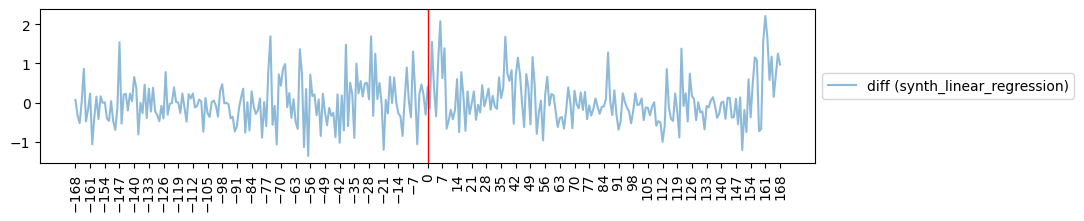

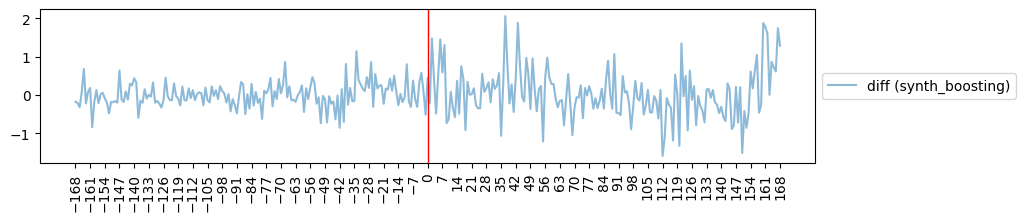

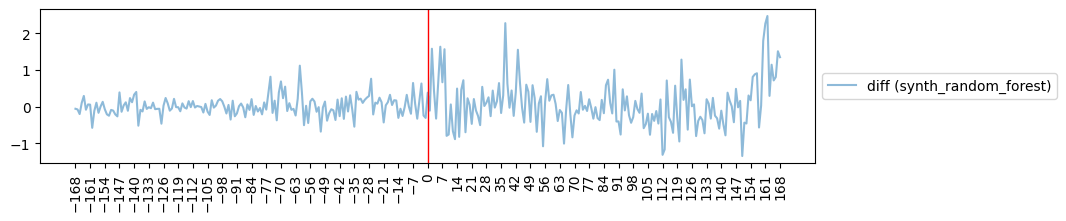

----------


In [26]:
import random

random.seed(20230404)

for df in random.sample(dfs, 5):
    for method in [
        "synth_mean",
        "synth_lasso",
        "synth_linear_regression",
        "synth_boosting",
        "synth_random_forest",
    ]:
        fig, ax = plt.subplots(figsize=(10, 2))
        # plot_coverage_sequence(
        #     df.rename(columns={"real": "count"}), ax=ax, label="real"
        # )
        # plot_coverage_sequence(
        #     df.rename(columns={method: "count"}), ax=ax, label=method
        # )
        df["diff"] = df["real"] - df[method]
        plot_coverage_sequence(
            df.rename(columns={"diff": "count"}), ax=ax, label=f"diff ({method})"
        )
        # df["relative_performance"] = df["diff"].abs() / df["real"].abs()
        # plot_coverage_sequence(
        #     df.rename(columns={"relative_performance": "count"}), ax=ax, label=f"relative_performance ({method})"
        # )
        # plot horizontal line at 1
        # ax.axhline(1, color="black", linestyle="--")
        plt.show()
    print("----------")